# Exercise 1 for Digital Humanities
Author: Tobias Famos

## Preparing the Data

<AxesSubplot: >

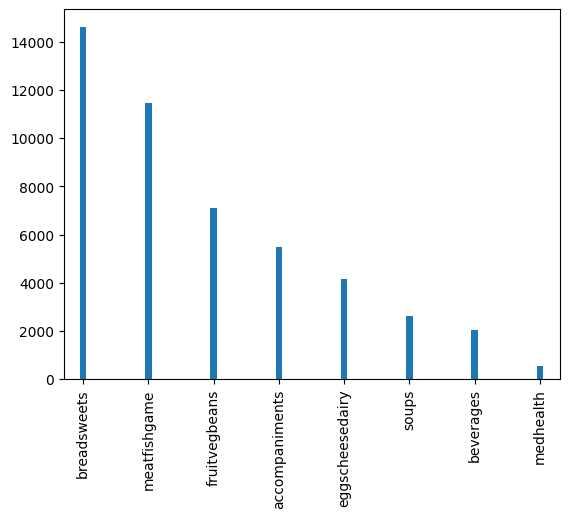

In [1]:
import os
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy as scipy

df = pd.read_csv("feeding-america.csv", index_col='date')
df.head()
df['recipe_class'].value_counts()
df['recipe_class'].value_counts().plot(kind='bar', color="C0", width=0.1)

In [2]:
def plot_trend(column, df, line_color='grey', xlim=(1810, 1930)):
    slope, intercept, _, _, _ = scipy.stats.linregress(df.index, df[column].fillna(0).values)
    ax = df[column].plot(style='o', label=column)
    ax.plot(df.index, intercept + slope * df.index, '--',color=line_color, label='_nolegend_')
    ax.set_ylabel("fraction of recipes")
    ax.set_xlabel("year of publication")
    ax.set_xlim(xlim)


<AxesSubplot: xlabel='date'>

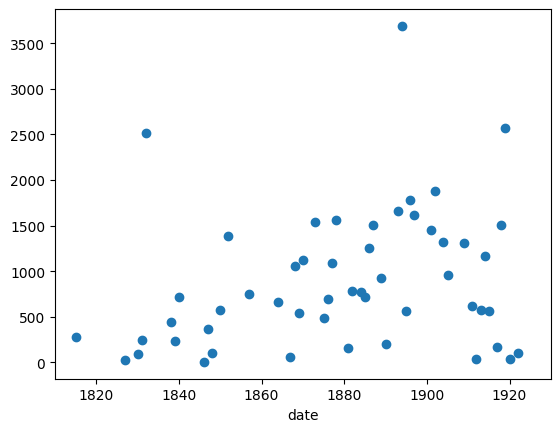

In [3]:
grouped = df.groupby('date')
recipe_counts = grouped.size()
recipe_counts.plot(style='o', xlim=(1810, 1930))

In [4]:
ingredients = df['ingredients'].str.split(';')
ingredientsByDates = ingredients.groupby('date')
ingredients = ingredientsByDates.sum()
sum = ingredients.apply(pd.Series.value_counts)
ingredientsNormaizied = sum.divide(recipe_counts, 0)

# Question 1
The ingredients have been analyzed with the following brute force code. I have not included all the outputs, as this would fill up the file a lot.

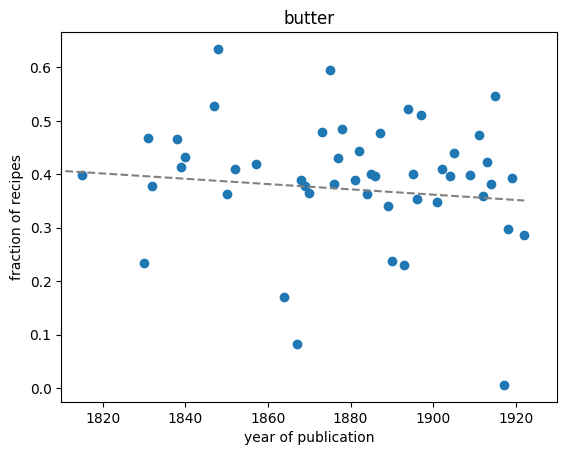

In [5]:
keys = sum.keys()
for key in keys:
    plot_trend(key, ingredientsNormaizied)
    plt.title(key)
    plt.show()
    break;

Two ingredinets that appear more frequently in the beginning of the 19th century are:
- nutmeg
- mace
As can be seen in the figures below

Text(0.5, 1.0, 'Nutmeg and Mace')

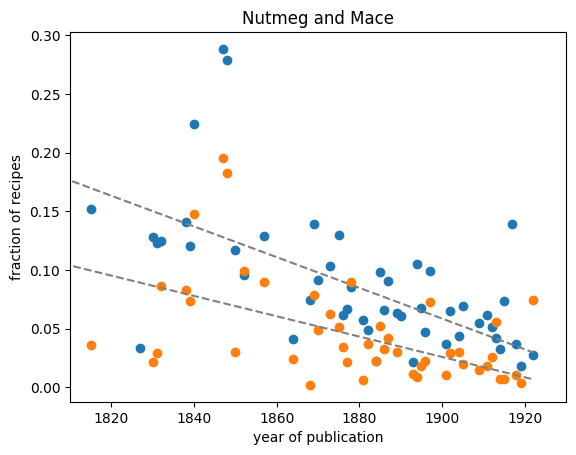

In [6]:
plot_trend("nutmeg", ingredientsNormaizied)
plot_trend("mace", ingredientsNormaizied)
plt.title("Nutmeg and Mace")

Two ingredients that appear more frequent in the beginning of the 20th century are:
- salt
- egg yolk

As can be sen in the figure below.

Text(0.5, 1.0, 'Salt and Egg Yolk')

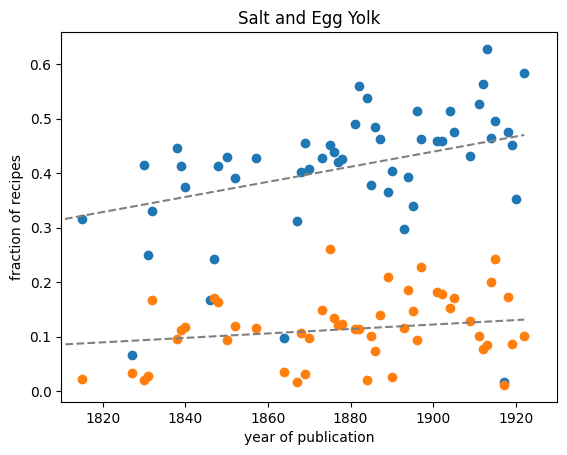

In [7]:
plot_trend("salt", ingredientsNormaizied)
plot_trend("egg yolk", ingredientsNormaizied)
plt.title("Salt and Egg Yolk")

## Task 2
Can you compare the recipes appearing in books published between 1820-1840
with those from the period 1900–1920? Which are for you the main differences?

- Number of Receipes provided?



In [8]:
df = pd.read_csv("feeding-america.csv")
df.head()
df['date']
df.keys()
df['date'] = pd.to_numeric(df['date'])
nineteenthCentury = df.loc[(df['date']>=1900) & (df['date'] <= (1920))]
eighteenthCentury = df.loc[(df['date'] >= 1820) & (df['date'] <= (1840))]


In [9]:
len(eighteenthCentury)

4276

In [10]:
print(len(nineteenthCentury)/len(eighteenthCentury))

3.313376987839102


The first difference is that in the period from 1900 to 1920 there have been a lot more receipes published than in the period from 1820 to 1840.
Namely 3.3 times as many.

<AxesSubplot: >

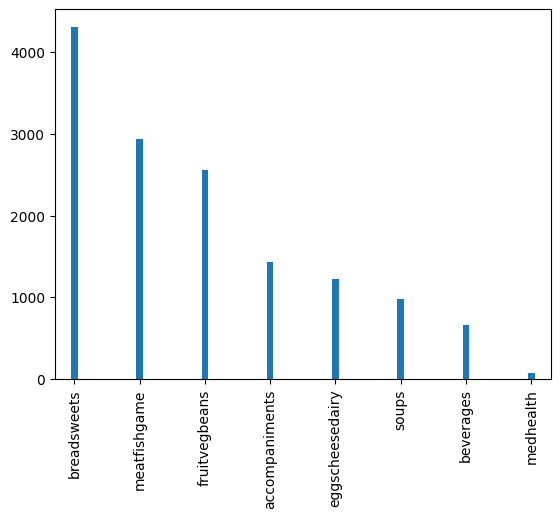

In [11]:
nineteenthCentury['recipe_class'].value_counts()
nineteenthCentury['recipe_class'].value_counts().plot(kind='bar', color="C0", width=0.1)

<AxesSubplot: >

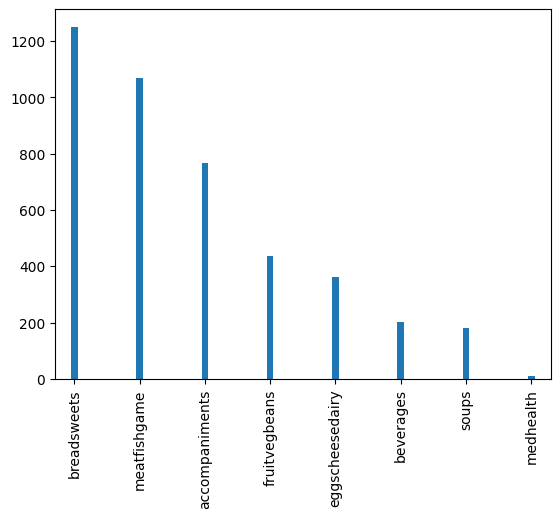

In [12]:
eighteenthCentury['recipe_class'].value_counts()
eighteenthCentury['recipe_class'].value_counts().plot(kind='bar', color="C0", width=0.1)

Quite interestingly, the categories of the receipes and the distribution of the categories has remained about the same in the two time periods.

I am sure there would be more differences, but I was not able to find any more.